In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'asl-alphabet:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F23079%2F29550%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240429%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240429T154032Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0827a6dda5445d58438d1fdcf4c7db99ad1035353a091fa3d25f85824b7c665bbcb50fe17998b2b33dae7be4e19de46196e164fd68c42526c92a05b4bed0ab03ac3c9a52419729a59f86f3b7c82d9d33edfd3a74816f40cb4f2ea132b5b0d4b2f04e844fb8f2a13184974686db9b5f5d055d46fc0ef77481fdf02c27218b2faea6fca779982dcb50adcbd6ce743f095f9463118a0aef5e522502b4a0adea509c8ea67b06a0c0981351fb081b5b862fbba63f7d12aee2ba25d3eb22dcd7385c37da7481c1c4f64d3e6168aa1753aae80ae3fe5a8048497ae785d4fe454fe48f71b69baee9dd0c64d79713e0637d30138efe537e02a65c54f890361cd9dc03aa50'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1100887034 bytes downloaded
Downloaded and uncompressed: asl-alphabet
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z2027.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z938.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z2930.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z1847.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z2228.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z1176.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z1113.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z2220.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Z/Z2598.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/E/E1181.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/E/E464.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/E/E1515.jpg
/kaggle/input/asl-alphabet/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!pip install split-folders

In [ ]:
!mkdir -p datasets
!ls /kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train

A  B  C  D  del  E  F  G  H  I	J  K  L  M  N  nothing	O  P  Q  R  S  space  T  U  V  W  X  Y	Z


In [ ]:
import splitfolders
train_src = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

splitfolders.ratio(train_src, output="datasets/asl_alphabet",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 87000 files [00:35, 2458.62 files/s]


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, GlobalAveragePooling2D
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_dir = 'datasets/asl_alphabet/train'
val_dir = 'datasets/asl_alphabet/val'
test_dir  = 'datasets/asl_alphabet/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
target_size = (32,32) # dataset pic = 200x200

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen   = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen  = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 69600 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [ ]:
labels = list(train_generator.class_indices.keys())
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:

TRAIN_PATH = train_dir
def sample_images(labels):
    # Create Subplots
    y_size = 12
    if(len(labels)<10):
        y_size = y_size * len(labels) / 10
    fig, axs = plt.subplots(len(labels), 9, figsize=(y_size, 13))

    for i, label in enumerate(labels):
        axs[i, 0].text(0.5, 0.5, label, ha='center', va='center', fontsize=8)
        axs[i, 0].axis('off')

        label_path = os.path.join(TRAIN_PATH, label)
        list_files = os.listdir(label_path)

        for j in range(8):
            img_label = cv2.imread(os.path.join(label_path, list_files[j]))
            img_label = cv2.cvtColor(img_label, cv2.COLOR_BGR2RGB)
            axs[i, j+1].imshow(img_label)
            axs[i, j+1].axis("off")

    # Title
    plt.suptitle("Sample Images in ASL Alphabet Dataset", x=0.55, y=0.92)

    # Show
    plt.show()

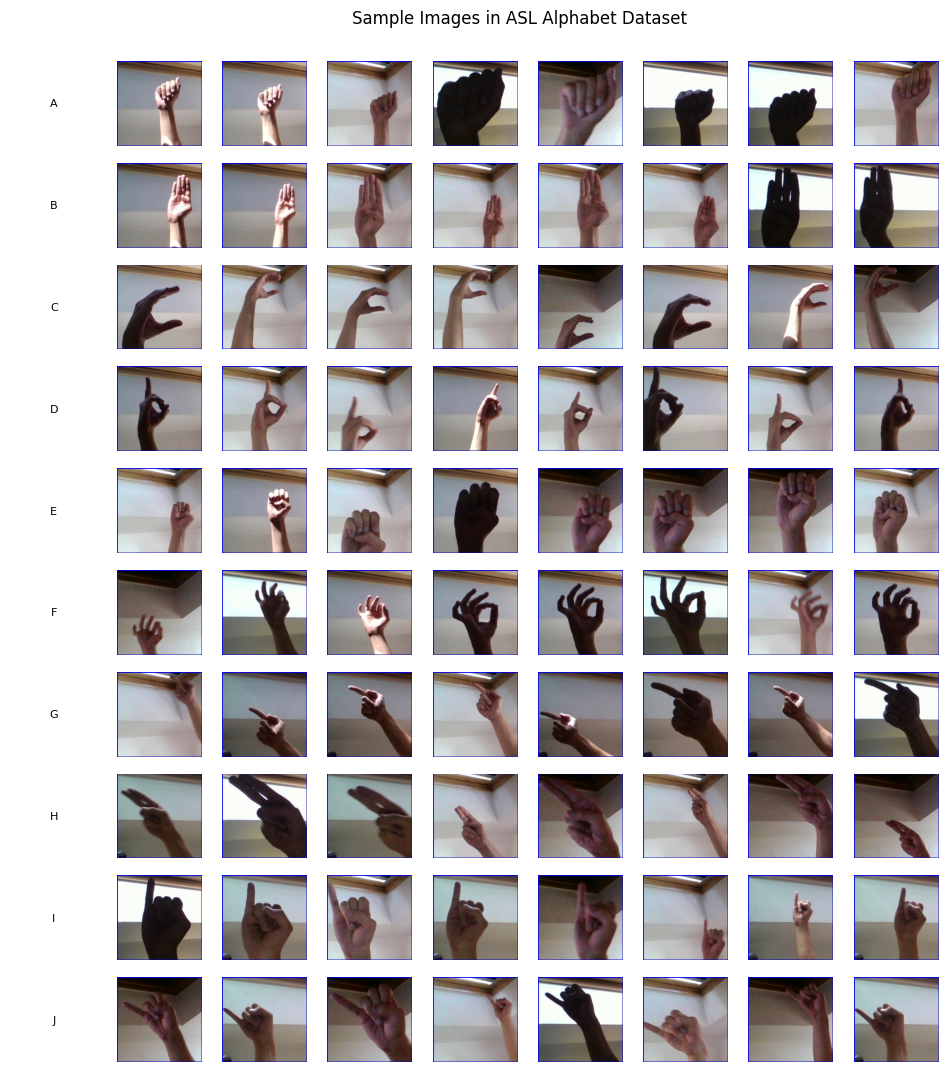

In [ ]:
sample_images(labels[:10])

In [ ]:
num_classes = len(labels)
input_shape = (32,32,1)

In [ ]:
# Build Model
model = models.Sequential()
# 1st convolution layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 2nd convolution layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 3rd convolution layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# fully-connected layers
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                        

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint path
checkpoint_path = "best_model.keras"

# Create ModelCheckpoint callback
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')


In [ ]:
# Compile Model
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[checkpoint])

Epoch 1/20
2175/2175 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.9918
Epoch 1: val_accuracy did not improve from 0.97218
2175/2175 [==============================] - 226s 104ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.1871 - val_accuracy: 0.9459
Epoch 2/20
2175/2175 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9925
Epoch 2: val_accuracy improved from 0.97218 to 0.99046, saving model to best_model.keras
2175/2175 [==============================] - 219s 101ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 3/20
2175/2175 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9925
Epoch 3: val_accuracy did not improve from 0.99046
2175/2175 [==============================] - 227s 104ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 1.0100 - val_accuracy: 0.8083
Epoch 4/20
2175/2175 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9929
Epoch 

In [ ]:
scores = model.evaluate(test_generator)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

272/272 [==============================] - 14s 51ms/step - loss: 0.0327 - accuracy: 0.9901
Test loss:  0.03272172063589096
Test accuracy:  0.9901149272918701


In [ ]:
model.save("asl_alphabet_cnn.h5")